In [1]:
!pip install numpy
!pip install pandas

  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 9.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 10.5 MB/s eta 0:00:00


In [2]:
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 11.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.6/362.6 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.1 MB/s eta 0:00:0000:0100:01
Using cached pillow-11.3.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 5.0 MB/s eta 0:00:00
  Using cached scikit_learn-1.7.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.16.2-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_6

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv('Advertising.csv',index_col=0)

In [8]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
data.shape

(200, 4)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<Axes: >

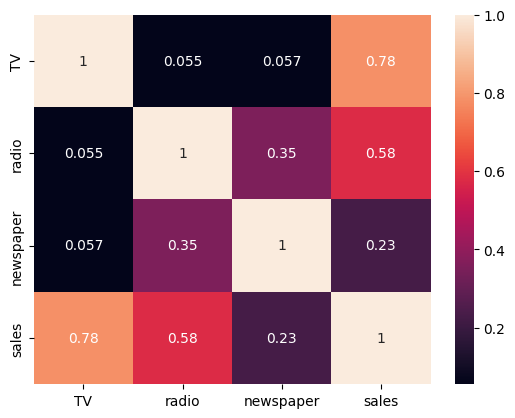

In [12]:
sns.heatmap(data = data.corr(), annot=True)


<Axes: >

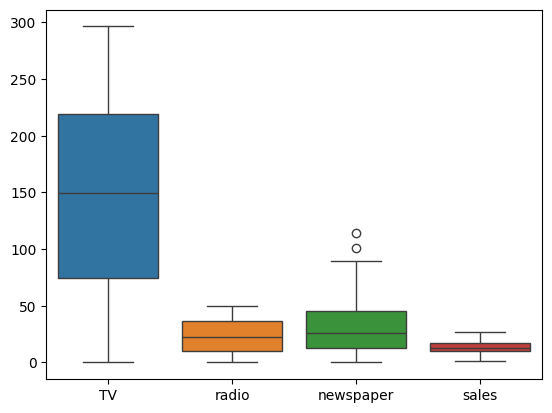

In [13]:
sns.boxplot(data = data)

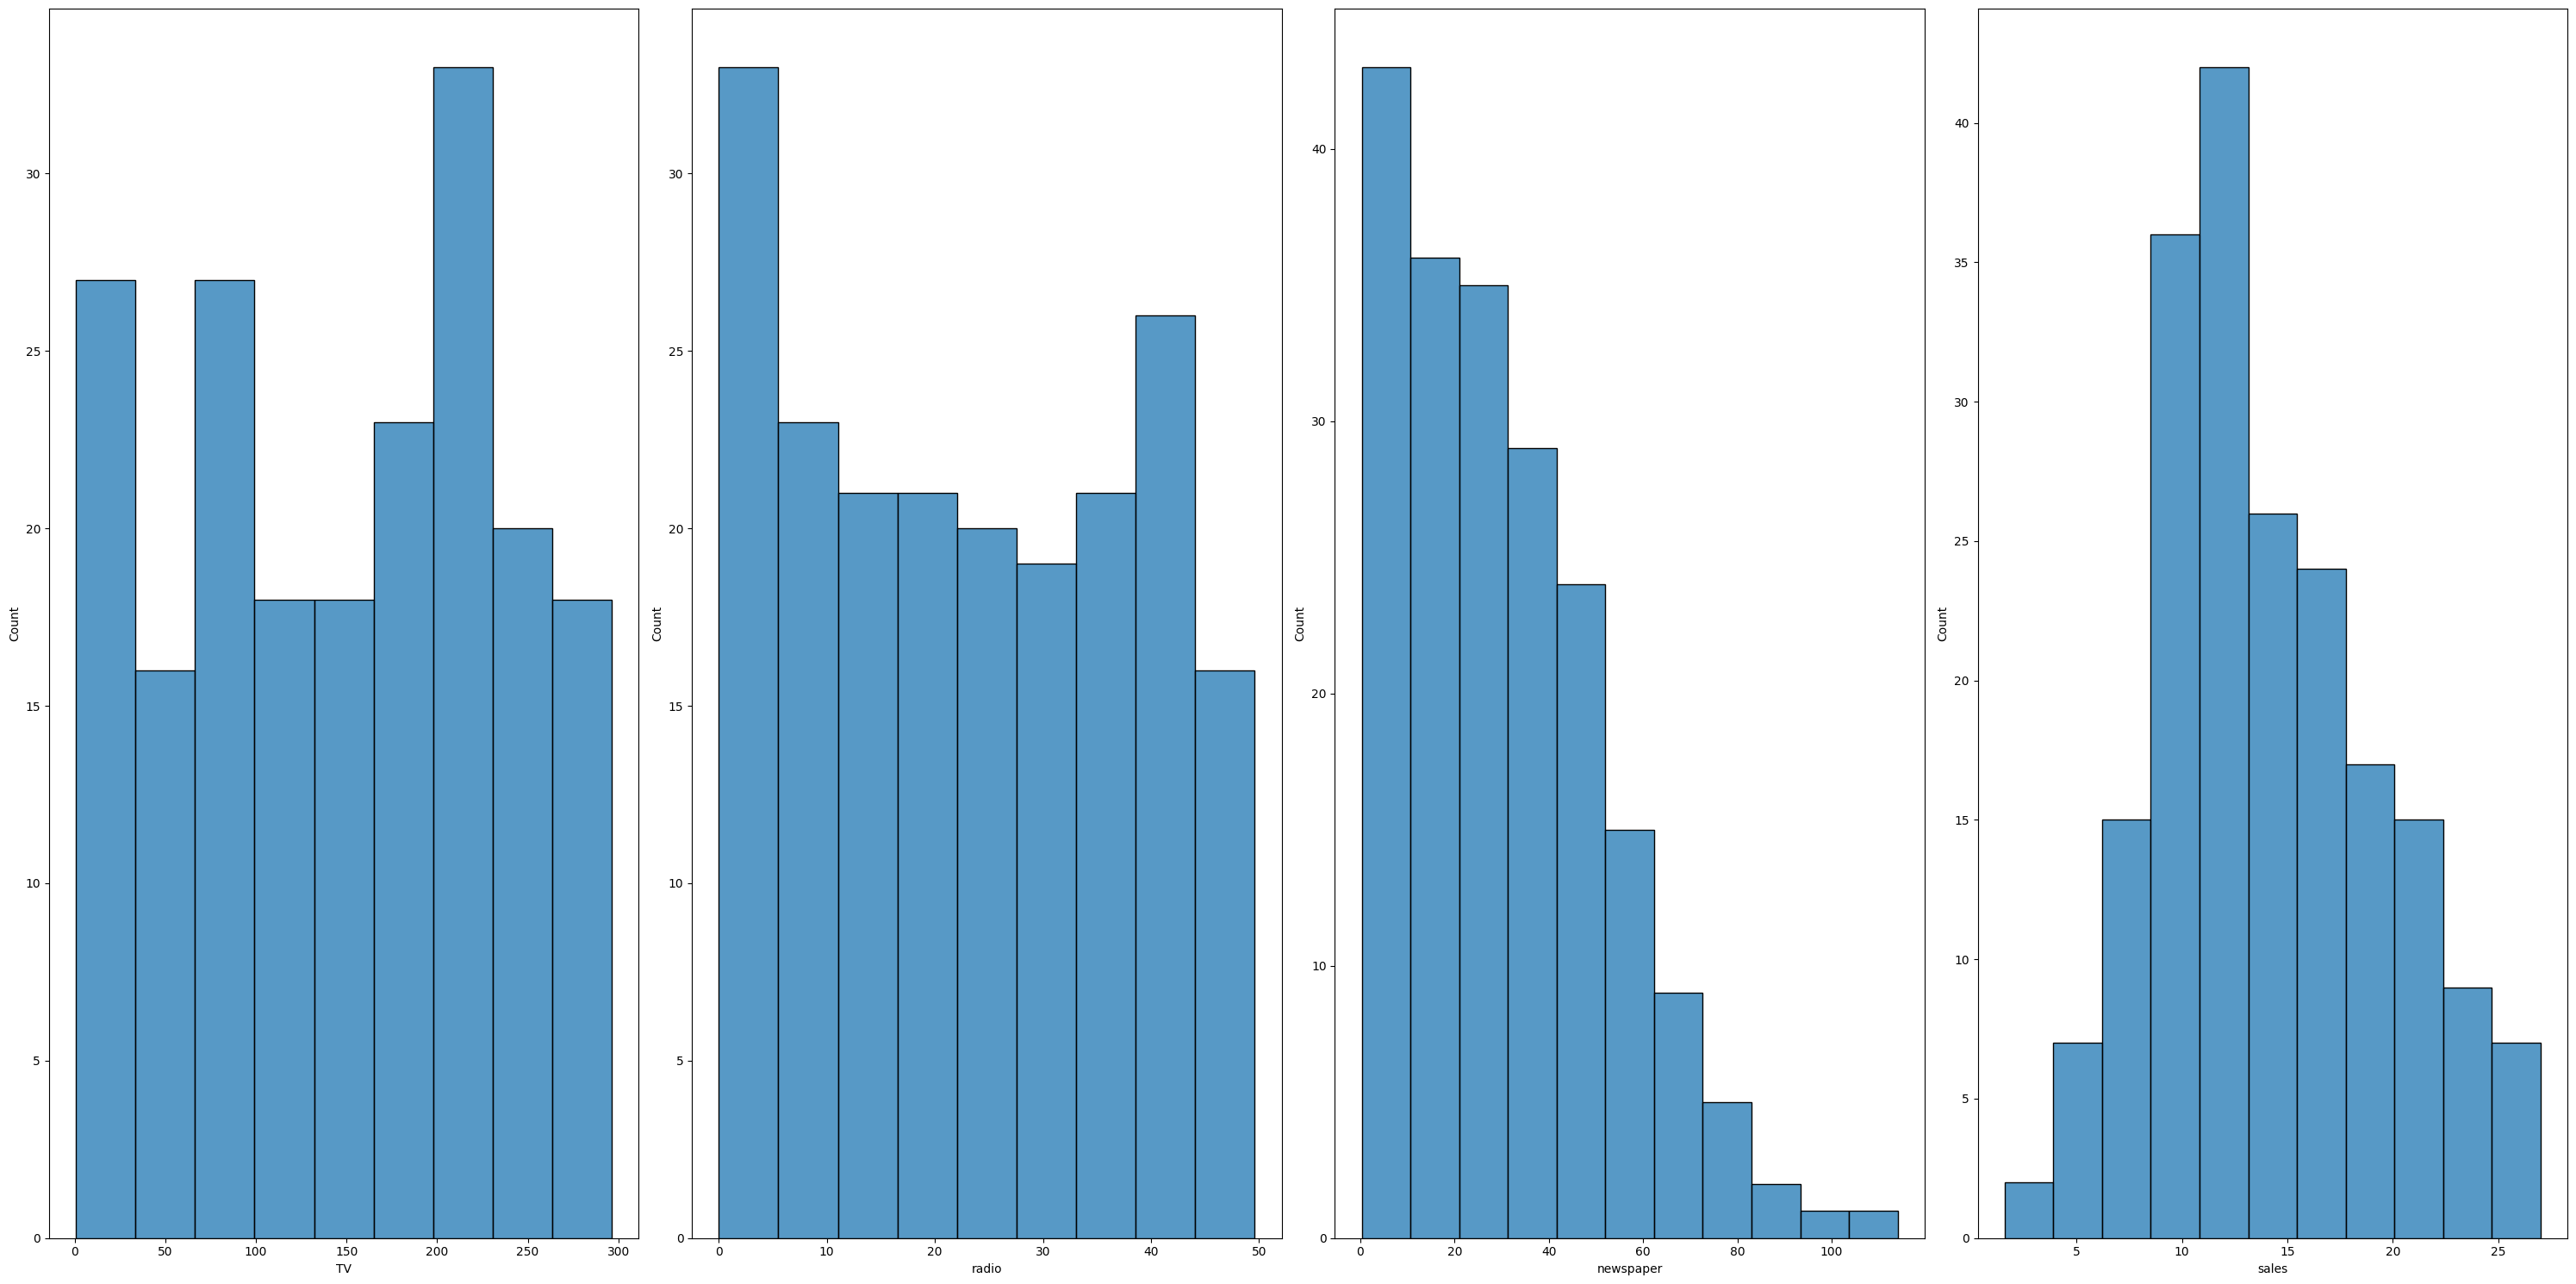

In [14]:
fig, axes = plt.subplots(ncols=len(data.columns), figsize=(30,15))
for ax, col in zip(axes, data.columns):
  sns.histplot(data[col], ax=ax)
  plt.tight_layout() 
plt.show()

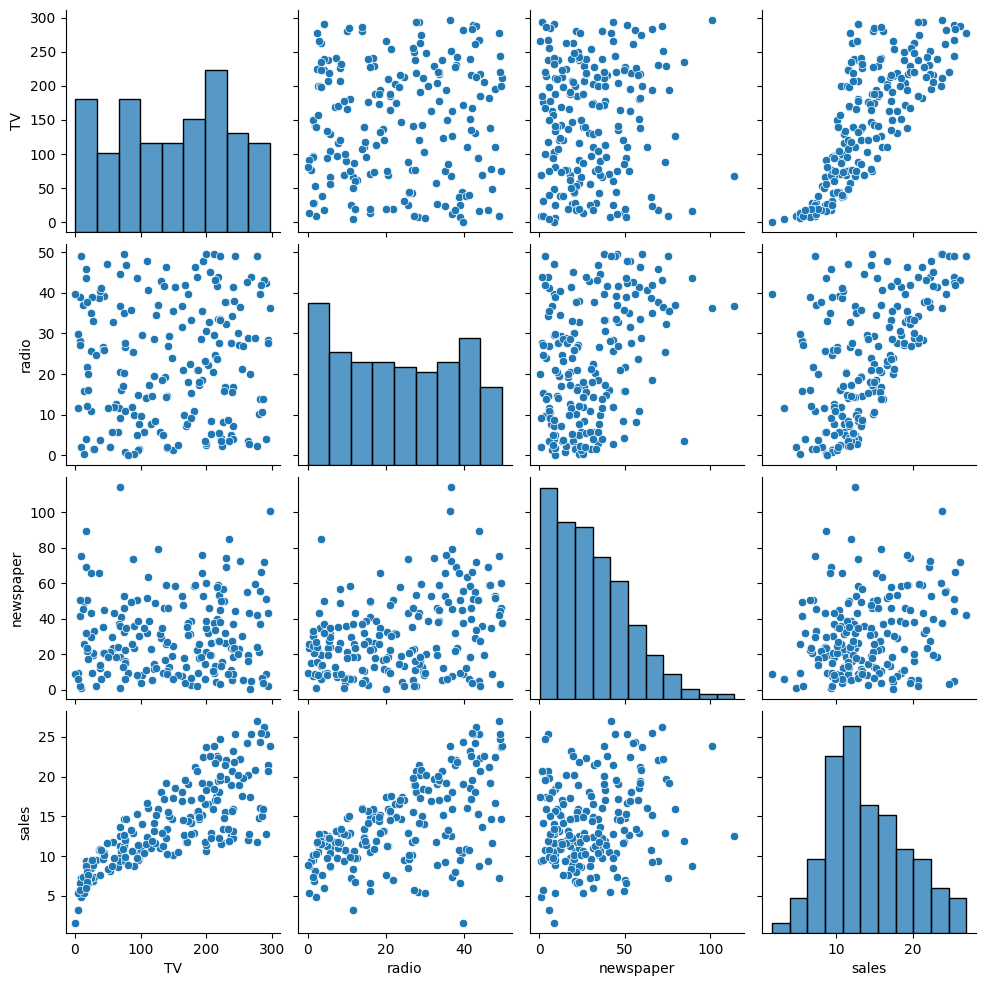

In [15]:
sns.pairplot(data)

In [17]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [18]:
y=data['sales']

In [19]:
x=data.drop(columns=['sales'])

In [20]:
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [21]:
x1 = sm.add_constant(x)

In [22]:
x1.head()

,const,TV,radio,newspaper
1,1.0,230.1,37.8,69.2
2,1.0,44.5,39.3,45.1
3,1.0,17.2,45.9,69.3
4,1.0,151.5,41.3,58.5
5,1.0,180.8,10.8,58.4


In [23]:
x1.describe().T

,count,mean,std,min,25%,50%,75%,max
const,200.0,1.0000,0.000000,1.0,1.000,1.00,1.000,1.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0


In [24]:
model = OLS(y,x1).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        14:21:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [26]:
model2 = OLS(y, x1.drop('newspaper', axis=1)).fit()

In [27]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 01 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        14:22:52   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

### Approach 2(a) - Taking Single independent variable

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr_model = LinearRegression()
y=data['sales']
# x=data.drop(columns=['sales'])
x=data[['TV']]
lr_model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
y_pred =  lr_model.predict(x)
data['y_pred'] = y_pred

In [31]:
# r-squared
print("R2",lr_model.score(x,y))
RMSE = sqrt(sum((y_pred - y)**2)/len(y))
print("RMSE:",RMSE)

R2 0.611875050850071
RMSE: 3.2423221486546887


In [32]:
lr_model.coef_

array([0.04753664])

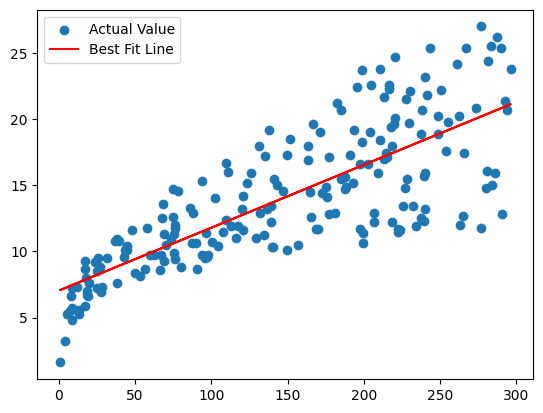

In [33]:
plt.scatter(x=data['TV'], y=data['sales'], label ='Actual Value')
plt.plot(data['TV'],data['y_pred'], color='red', label = 'Best Fit Line')
plt.legend()

### Approach 2(b) - Taking all variables 

In [34]:
lr_model = LinearRegression()
y=data['sales']
x=data.drop(columns=['sales'])
lr_model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
lr_model.coef_

array([ 0.04566146,  0.18853002, -0.00103749,  0.00217059])

In [36]:
lr_model.intercept_

np.float64(2.923624474380695)

In [37]:
# r-squared
lr_model.score(x,y)

0.8972106381789522

In [38]:
y_pred = lr_model.predict(x)

In [39]:
y_pred

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

In [40]:
data['y_pred'] = y_pred
data

,TV,radio,newspaper,sales,y_pred
1,230.1,37.8,69.2,22.1,20.523974
2,44.5,39.3,45.1,10.4,12.337855
3,17.2,45.9,69.3,9.3,12.307671
4,151.5,41.3,58.5,18.5,17.597830
5,180.8,10.8,58.4,12.9,13.188672
...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,5.370342
197,94.2,4.9,8.1,9.7,8.165312
198,177.0,9.3,6.4,12.8,12.785921
199,283.6,42.0,66.2,25.5,23.767321


In [41]:
RMSE = sqrt(sum((y_pred - y)**2)/len(y))
RMSE

1.6685701407225697

In [42]:
x

,TV,radio,newspaper,y_pred
1,230.1,37.8,69.2,17.970775
2,44.5,39.3,45.1,9.147974
3,17.2,45.9,69.3,7.850224
4,151.5,41.3,58.5,14.234395
5,180.8,10.8,58.4,15.627218
...,...,...,...,...
196,38.2,3.7,13.8,8.848493
197,94.2,4.9,8.1,11.510545
198,177.0,9.3,6.4,15.446579
199,283.6,42.0,66.2,20.513985
